<a href="https://colab.research.google.com/github/hanburglar31/videogames.eda.python/blob/main/Capstone_3_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab Notebook for Capstone 3

In this project, we'll be exploring a database of video game sales and ratings to uncover any potential connections between user ratings, critic ratings, genre, and sales figures. We will assume that our finidngs will be presented to video game developers, potentially at a prominent industry event like E3 (Electronic Entertainment Expo). By examining these correlations, we can provide valuable insights to inform game development strategies and decision-making processes.

In [54]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats.stats import ttest_ind
import io
import warnings

warnings.filterwarnings('ignore')

In [55]:
#Link to github file to access datset
df = pd.read_csv('https://raw.githubusercontent.com/hanburglar31/videogames.eda.python/main/video_games_sales_rating3.csv')

Let's take a look at the database to see what we are working with.

In [53]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
4,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN


We can immediately see that we have some missing values. Let's take a look at the info to see what we are missing.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16718 entries, 0 to 16717
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16716 non-null  object 
 1   Platform         16718 non-null  object 
 2   Year_of_Release  16449 non-null  float64
 3   Genre            16716 non-null  object 
 4   Publisher        16664 non-null  object 
 5   NA_Sales         16718 non-null  float64
 6   EU_Sales         16718 non-null  float64
 7   JP_Sales         16718 non-null  float64
 8   Other_Sales      16718 non-null  float64
 9   Global_Sales     16718 non-null  float64
 10  Critic_Score     8136 non-null   float64
 11  Critic_Count     8136 non-null   float64
 12  User_Score       7589 non-null   float64
 13  User_Count       7589 non-null   float64
 14  Developer        10095 non-null  object 
 15  Rating           9949 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


We know that Critic Score and User Score are averages. How many users or critics have rated each of these games are irrelevent. Let's remove those columns and see what we're left with.

In [26]:
#remove `Critic_Count` and `User_Count` columns
dropped_columns_df = df.drop(columns=(['Critic_Count', 'User_Count']))
dropped_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16718 entries, 0 to 16717
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16716 non-null  object 
 1   Platform         16718 non-null  object 
 2   Year_of_Release  16449 non-null  float64
 3   Genre            16716 non-null  object 
 4   Publisher        16664 non-null  object 
 5   NA_Sales         16718 non-null  float64
 6   EU_Sales         16718 non-null  float64
 7   JP_Sales         16718 non-null  float64
 8   Other_Sales      16718 non-null  float64
 9   Global_Sales     16718 non-null  float64
 10  Critic_Score     8136 non-null   float64
 11  User_Score       7589 non-null   float64
 12  Developer        10095 non-null  object 
 13  Rating           9949 non-null   object 
dtypes: float64(8), object(6)
memory usage: 1.8+ MB


Since we want to test the correlation between user score and critic score on a game and how that effects the sales of the game, let's remove all null values from User Score as it has the least amount of data.

In [27]:
#remove null values from `Critic_Score`
game_df = dropped_columns_df.dropna(subset='User_Score')
game_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7589 entries, 1 to 16709
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7589 non-null   object 
 1   Platform         7589 non-null   object 
 2   Year_of_Release  7462 non-null   float64
 3   Genre            7589 non-null   object 
 4   Publisher        7583 non-null   object 
 5   NA_Sales         7589 non-null   float64
 6   EU_Sales         7589 non-null   float64
 7   JP_Sales         7589 non-null   float64
 8   Other_Sales      7589 non-null   float64
 9   Global_Sales     7589 non-null   float64
 10  Critic_Score     7016 non-null   float64
 11  User_Score       7589 non-null   float64
 12  Developer        7578 non-null   object 
 13  Rating           7503 non-null   object 
dtypes: float64(8), object(6)
memory usage: 889.3+ KB


It looks like we still have some missing values in Year or Release, Critic_Score and Rating. Let's remove all null values from those columns.

In [28]:
#remove all null values from `Year_of_Release`, `Publisher`, `Critic_Score`, `User_Score' and `Rating`
games_df = dropped_columns_df.dropna(subset=['Year_of_Release','Publisher','Critic_Score', 'User_Score', 'Rating'])
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6824 entries, 1 to 16709
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6824 non-null   object 
 1   Platform         6824 non-null   object 
 2   Year_of_Release  6824 non-null   float64
 3   Genre            6824 non-null   object 
 4   Publisher        6824 non-null   object 
 5   NA_Sales         6824 non-null   float64
 6   EU_Sales         6824 non-null   float64
 7   JP_Sales         6824 non-null   float64
 8   Other_Sales      6824 non-null   float64
 9   Global_Sales     6824 non-null   float64
 10  Critic_Score     6824 non-null   float64
 11  User_Score       6824 non-null   float64
 12  Developer        6824 non-null   object 
 13  Rating           6824 non-null   object 
dtypes: float64(8), object(6)
memory usage: 799.7+ KB


In [29]:

games_df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Developer,Rating
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,8.3,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,8.0,Nintendo,E
5,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,6.3,Good Science Studio,E
6,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,8.4,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,6.6,Nintendo,E


Awesome! Looks like our database is clean and ready for analysis!


# **Hypothesis 1:**

We want to test if there are any correlation and/or statistical differences between Global Sales data and regions like North America, Europe, Japan and Other.

*Null Hypothesis: There is no significant difference in Global Sales compared to other regions.*

*Alternate Hypothesis: There is a significant difference in Global Sales compared to other regions.*



---



Before we begin our sales comparison in different regions, let's test our data for normal distribution.

<Axes: xlabel='Global_Sales', ylabel='Density'>

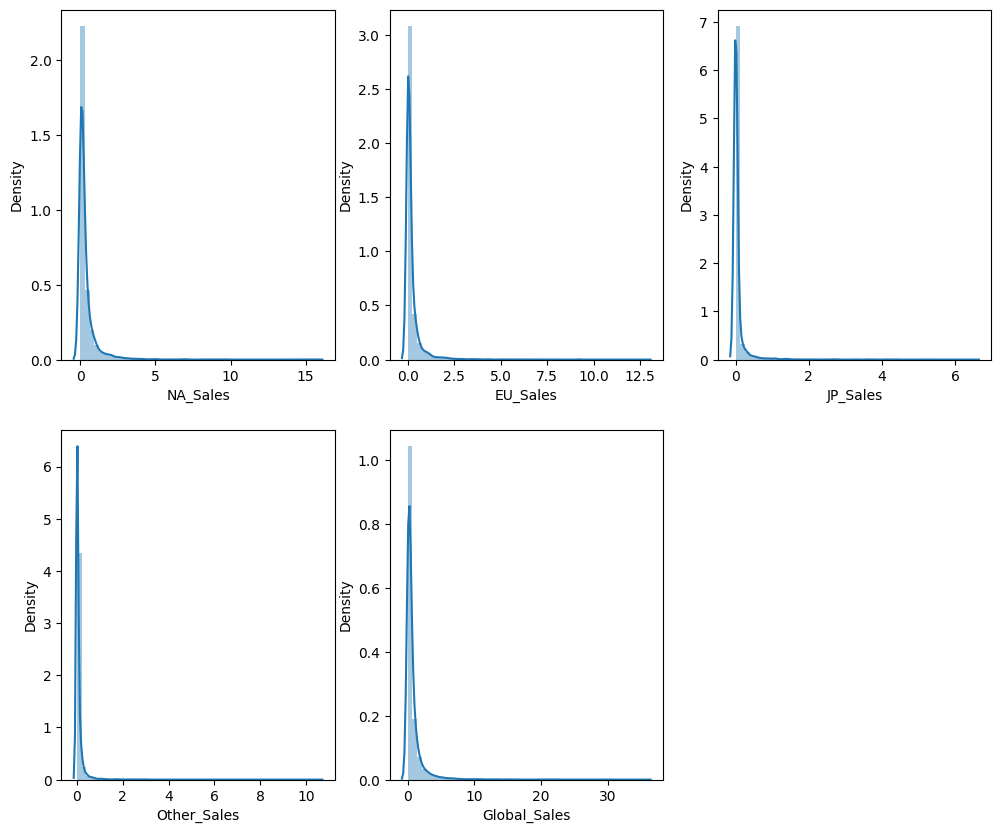

In [30]:
#set the graph size
plt.figure(figsize=(12,10))

#create histogram for each sales region
plt.subplot(2,3,1)
sns.distplot(games_df['NA_Sales'])
plt.subplot(2,3,2)
sns.distplot(games_df['EU_Sales'])
plt.subplot(2,3,3)
sns.distplot(games_df['JP_Sales'])
plt.subplot(2,3,4)
sns.distplot(games_df['Other_Sales'])
plt.subplot(2,3,5)
sns.distplot(games_df['Global_Sales'])

The sales numbers in our dataset are heavily skewed towards higher values, making it difficult to interpret the data. To make it easier to understand and analyze, we can apply a log transformation. This will help balance out the distribution and reduce the influence of extreme values. By taking the logarithm of the sales numbers, we can bring the values closer together and uncover patterns that might not be visible in the original skewed data. This will make our analysis more meaningful and easier to interpret.




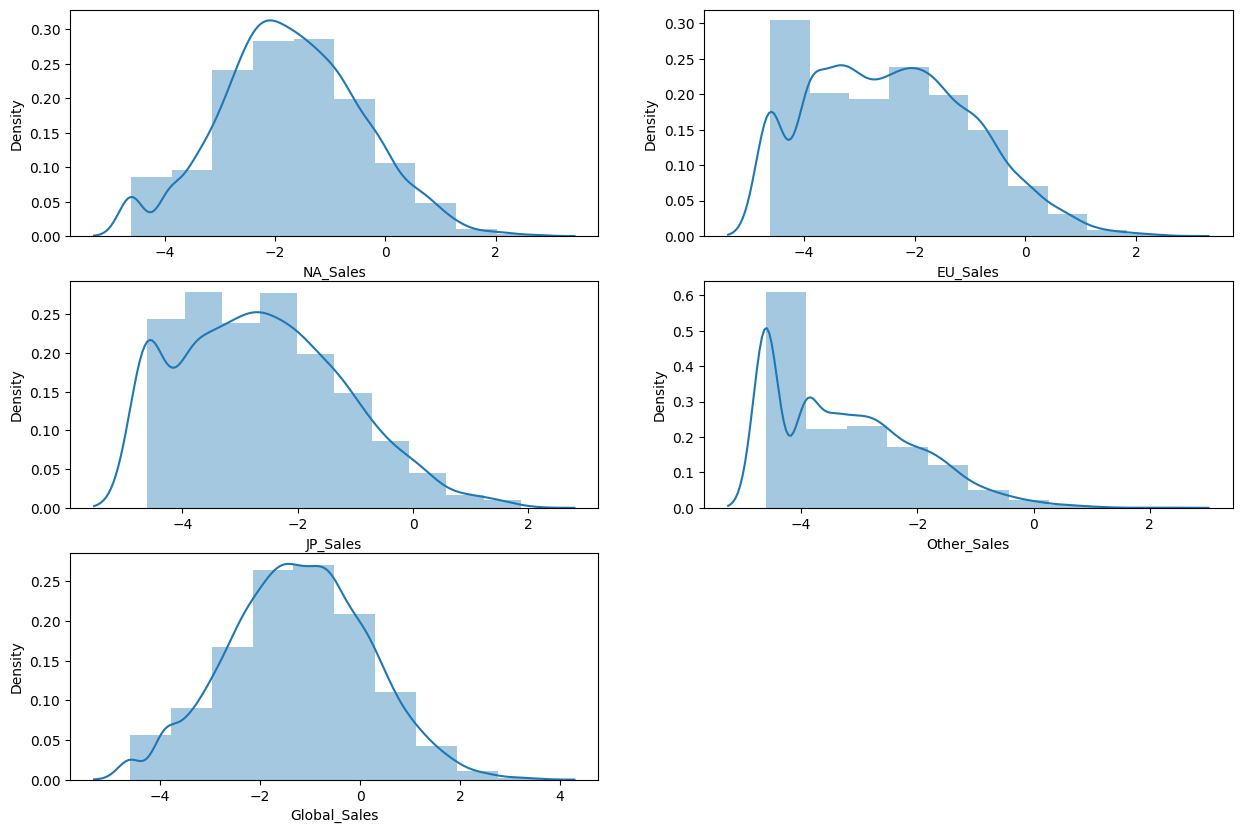

In [31]:
#set the graph size
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)

#select the column representing the region sales
region_sales_NA = games_df['NA_Sales']

#filter out negative or zero values
region_sales_NA = region_sales_NA[region_sales_NA >0]

#apply a log transform to the region sales
region_sales_log_NA = np.log(region_sales_NA)

#create a histogram of the log-transformed region sales
sns.distplot(region_sales_log_NA, bins=10, kde=True)

#same for EU
plt.subplot(3,2,2)
region_sales_EU = games_df['EU_Sales']
region_sales_EU = region_sales_EU[region_sales_EU >0]
region_sales_log_EU = np.log(region_sales_EU)
sns.distplot(region_sales_log_EU, bins=10, kde=True)

#same for JP
plt.subplot(3,2,3)
region_sales_JP = games_df['JP_Sales']
region_sales_JP = region_sales_JP[region_sales_JP >0]
region_sales_log_JP = np.log(region_sales_JP)
sns.distplot(region_sales_log_JP, bins=10, kde=True)

#same for Other
plt.subplot(3,2,4)
region_sales_Other = games_df['Other_Sales']
region_sales_Other = region_sales_Other[region_sales_Other >0]
region_sales_log_Other = np.log(region_sales_Other)
sns.distplot(region_sales_log_Other, bins=10, kde=True)

#same for Other
plt.subplot(3,2,5)
region_sales_Global = games_df['Global_Sales']
region_sales_Global = region_sales_Global[region_sales_Global >0]
region_sales_log_Global = np.log(region_sales_Global)
sns.distplot(region_sales_log_Global, bins=10, kde=True)

# Show the histogram
plt.show()


Perfect.  All of these data seem to be right skewed normal distribution. Let's move onto comparisons.

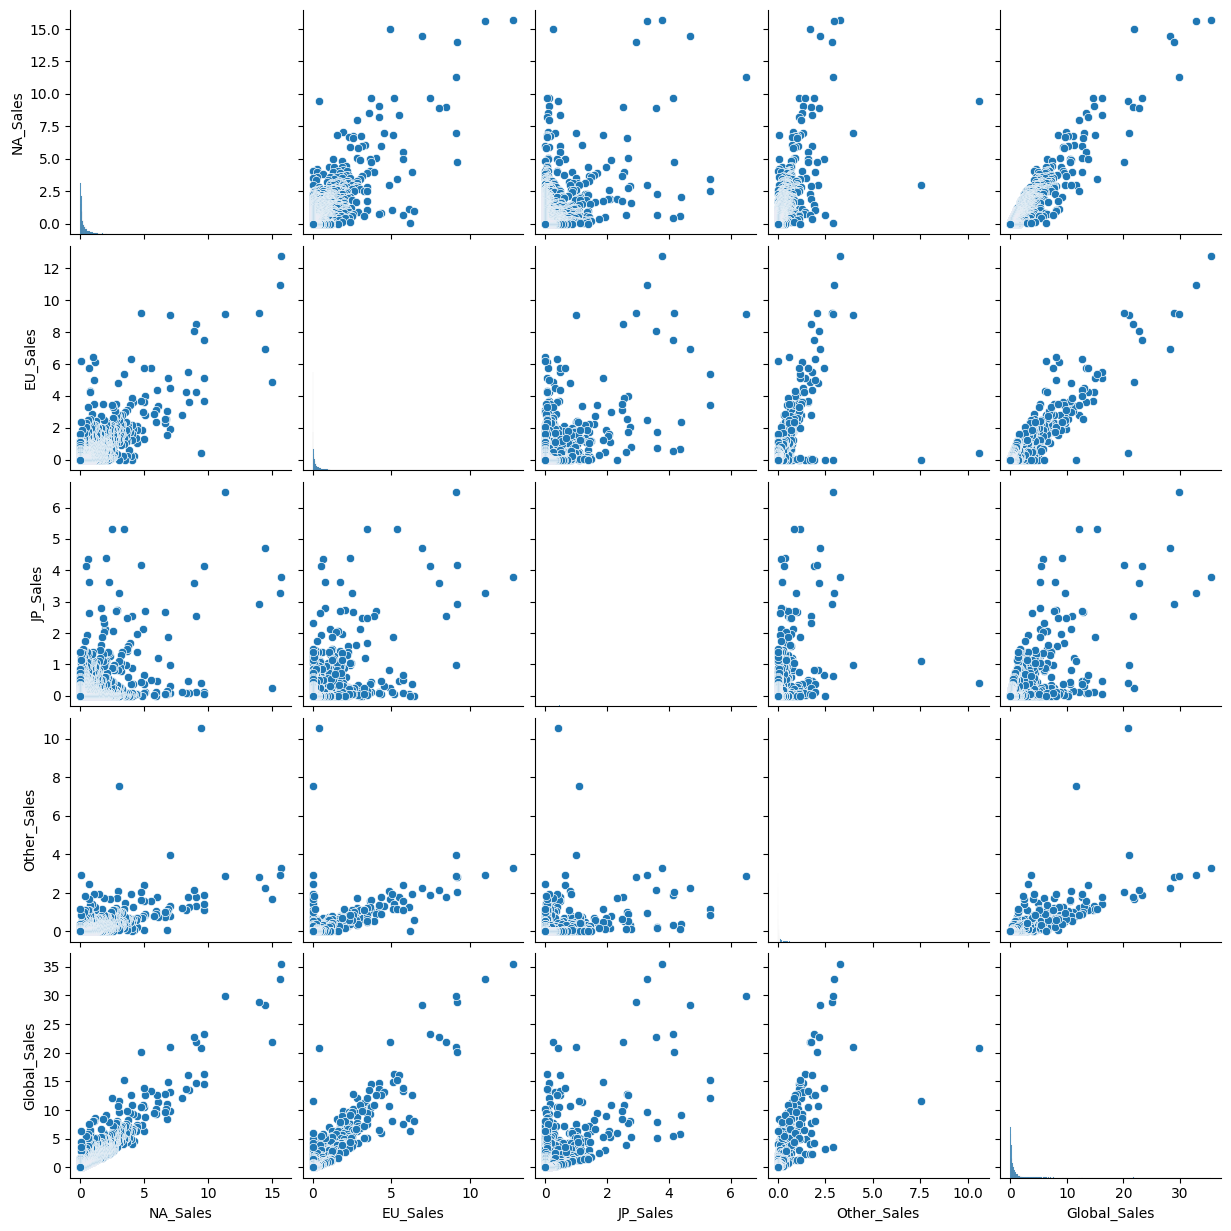

In [32]:
#compare all region's sales to each other
sns.pairplot(games_df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']])

Scatterplot shows us mostly positive correlation between region sales. But is there a statistically significant difference in the numbers?

In [33]:
#independent t-test for all regions compared to `Global_Sales`
print(ttest_ind(games_df['Global_Sales'], games_df['NA_Sales']))
print(ttest_ind(games_df['Global_Sales'], games_df['EU_Sales']))
print(ttest_ind(games_df['Global_Sales'], games_df['JP_Sales']))
print(ttest_ind(games_df['Global_Sales'], games_df['Other_Sales']))

Ttest_indResult(statistic=16.49763176181947, pvalue=1.4706951832454382e-60)
Ttest_indResult(statistic=24.541747217183396, pvalue=3.447950704941297e-130)
Ttest_indResult(statistic=33.72494798023676, pvalue=1.4721503228525854e-239)
Ttest_indResult(statistic=32.969262274661595, pvalue=1.9791749888136153e-229)


As expected, P value is so close to 0 that we can reject the null hyphesis that there is no difference in Global Sales compared to any of the regions tested.

How about correlation? Judging from the scatterplots above, we can assume strongest correlation is between Global and North America sale. There also seems to be a positive correlation for all regions compared to Global, although Japan seems to have least correlation. Let's take a deeper dive into this.

In [34]:
#Pearson R Test for all regions compared to `Global_Sales`
print(stats.pearsonr(games_df['Global_Sales'], games_df['NA_Sales']))
print(stats.pearsonr(games_df['Global_Sales'], games_df['EU_Sales']))
print(stats.pearsonr(games_df['Global_Sales'], games_df['JP_Sales']))
print(stats.pearsonr(games_df['Global_Sales'], games_df['Other_Sales']))

PearsonRResult(statistic=0.9404516612803714, pvalue=0.0)
PearsonRResult(statistic=0.9185409159911284, pvalue=0.0)
PearsonRResult(statistic=0.6270234365946479, pvalue=0.0)
PearsonRResult(statistic=0.768035896168643, pvalue=0.0)


Our assumption was correct that there is strongest positive correlation with North America and Global sales data.  We were also correct to assume that Japan and Global sales have the least positive correlation. This might be better visualized in a heatmap rather than scatterplot.

Text(0.5, 1.0, 'Sales Comparison by Region')

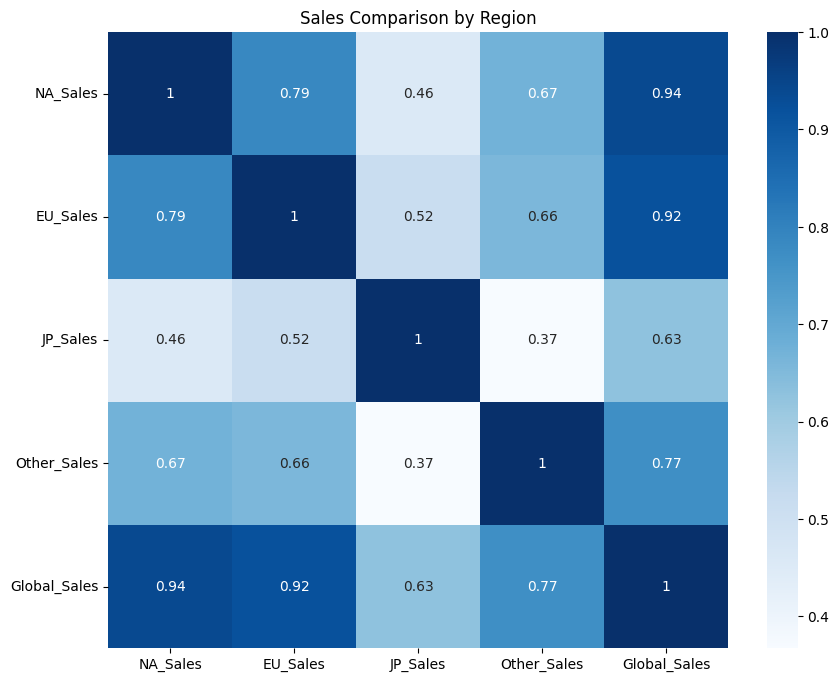

In [35]:
#select the columns for different sales region
sales_list = games_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
plt.figure(figsize=(10,8))

#create a heatmap of the correlation matrix for sales_list
sns.heatmap(sales_list.corr(), cmap='Blues', annot=True)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Sales Comparison by Region')

#**Recommendation 1:**
Based on our findings, it's important to dive deeper into the factors and preferences that contribute to higher sales in North America and Europe. Conducting thorough market research and analyzing consumer behavior will provide valuable insights into regional market dynamics, consumer preferences, cultural aspects, and market trends. This information can guide the development of tailored games when targeting specific regions effectively.

# **Hypothesis 2:**

We want to test if there are any correlation between what users like and what critics like. We'll be using the average scores for both groups to analyze this.


*Null Hypothesis:*  There is no relationship between User Score and Critic Score

*Alternate Hypothesis*: There is a relationship between User Score and Critic Score

Text(0.5, 1.0, 'Critic Score vs User Score')

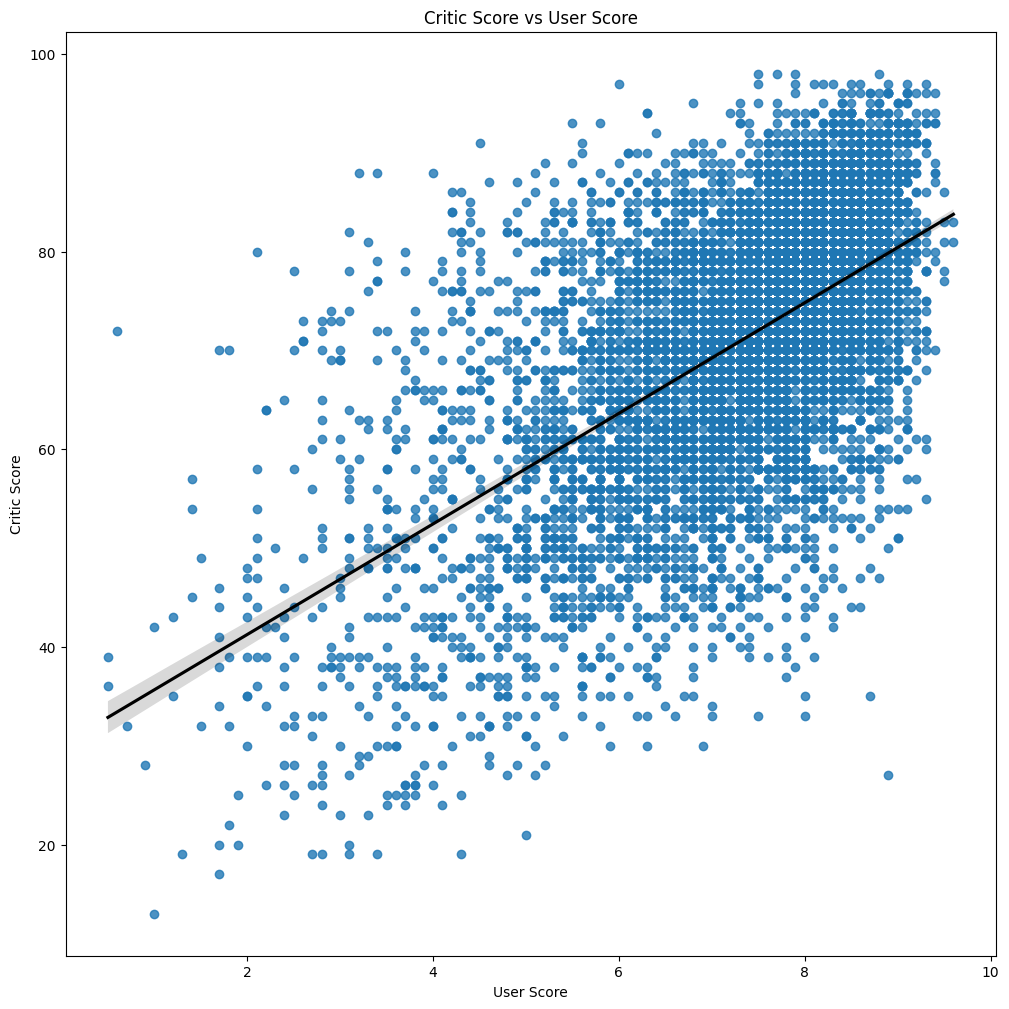

In [36]:
#set figure size
plt.figure(figsize=(12,12))
#plot `user_score` vs `critic_score` and change the trendline color to black
sns.regplot(game_df, x='User_Score', y='Critic_Score',line_kws={"color":"black"})
plt.xlabel("User Score")
plt.ylabel("Critic Score")
plt.title("Critic Score vs User Score")

It looks like there is a positive correlation between User score and Critic score. Let's run the Pearson R test to confirm.

In [37]:
#Pearson R Test for `User_Score` and `Critic_Score`
print(stats.pearsonr(games_df['User_Score'], games_df['Critic_Score']))

PearsonRResult(statistic=0.5803049924510105, pvalue=0.0)


Again, with a p value so close to 0, we can reject the null hypothesis that there is no relation between User Score and Critic Score. Correlation between these two are positive.

# **Recommendation 2:**
The takeaway here is that feedback is always valuable, no matter where it comes from. Even though game developers may not always appreciate critics, the fact that there's a positive correlation between user and critic reviews shows that they have similar likes and dislikes. This means that both user and critic reviews should be trusted when assessing the quality and appeal of games.

# **Extra Credit:**

In our first analysis, we concluded that further research may be warranted to find what factors contribute to higher correlation to Global Sales data. Let's take a look at how genres affect sales in different region. Will different regions prefer different type of game over the other?

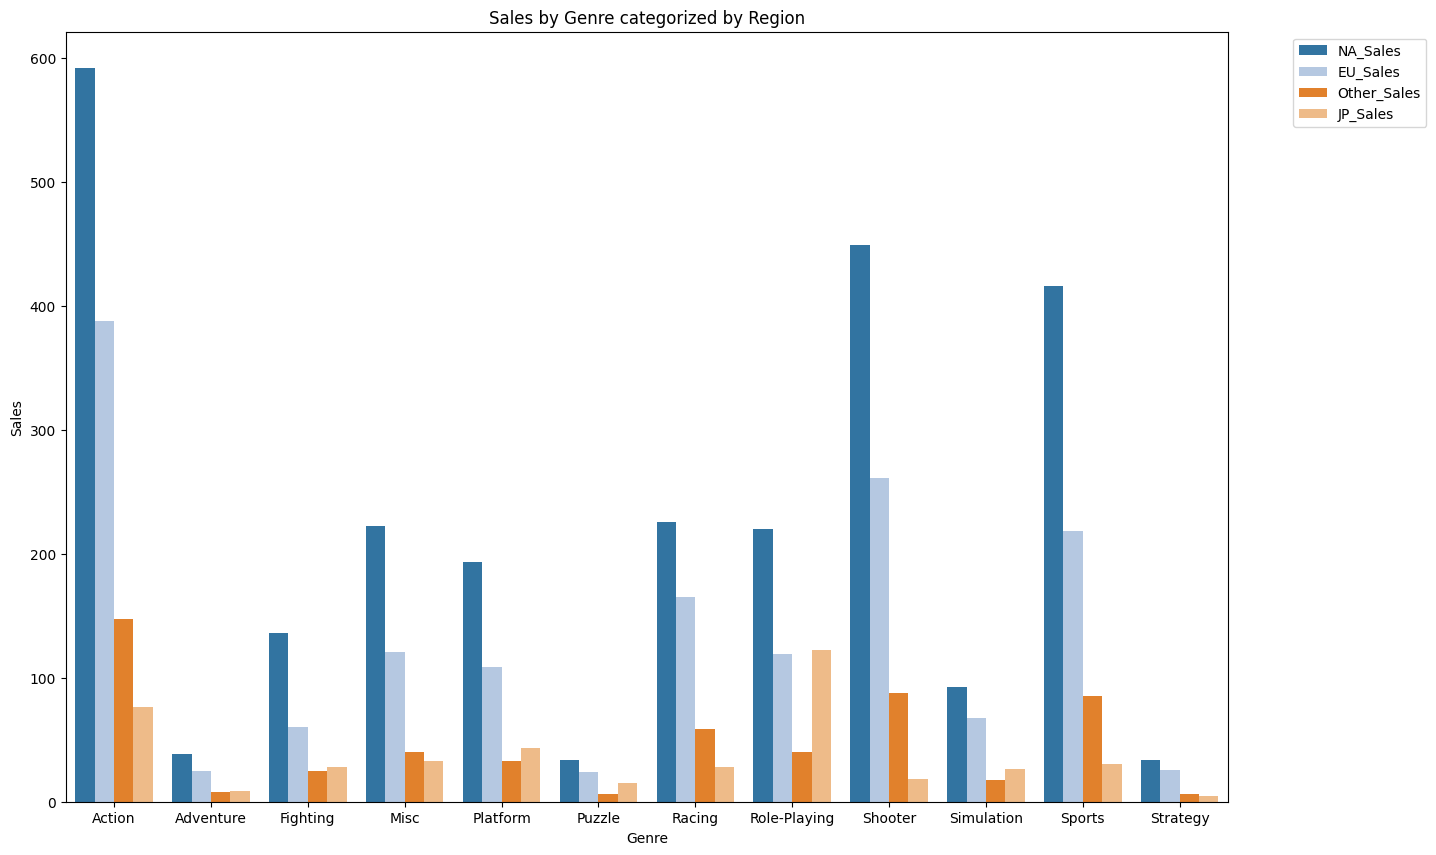

In [38]:
#crete a new list for genre_sales
genre_sales = games_df[['Genre', 'NA_Sales', 'EU_Sales', 'Other_Sales', 'JP_Sales']]
#aggregate sales total by their genre in each region
group_genre_sales = genre_sales.groupby(by=['Genre']).sum()
#reset the index to convert the grouped data back into regular DF with default numeric order
new_genre_df = group_genre_sales.reset_index()
#melt the DF to combine the sales column into a single column
new_genre_df= pd.melt(new_genre_df, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'Other_Sales', 'JP_Sales'], var_name='Region', value_name='Region_Sale')

#change the color of the graph
sns.set_palette("tab20")
#set the graph size
plt.figure(figsize=(15,10))
#set bar graph x axis and y axis and category
sns.barplot(x='Genre', y='Region_Sale', hue='Region', data=new_genre_df)
#customize the graph
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.title('Sales by Genre categorized by Region')
#move the legend to the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This is an interesting finding. It appears that North America, Europe, and other regions share similar genre preferences, but Japan stands out. While the favorite genre for all other regions is Action, Japan shows a preference for Role-Playing games. If you're a developer targeting the Japanese market, it would be wise to consider developing more RPGs to cater to their preferences.